In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread

def hog_plot(source,target,files):

# Load an example hand-drawn image
    image = imread(source, as_gray=True)

# Compute HOG features
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

# Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original and HOG image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input Image')

    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients (HOG)')
    final=os.path.join(target,files)
    plt.savefig(final)




In [4]:
import os



In [ ]:
path = "/content/sample_data/spiral/train/Patient"
target_path= "/content/sample_data/HOG/Patient"
dir_list = os.listdir(path)
for files in dir_list:
  filepath = os.path.join(path, files)
  hog_plot(filepath,target_path,files)

In [ ]:
!unzip "/content/sample_data/spiral.zip" -d "/content/sample_data/"

In [8]:
import shutil

def zip_folder(source_folder, output_zip):
    shutil.make_archive(output_zip, 'zip', source_folder)

# Specify the source folder and output zip file
source_folder = '/content/sample_data/HOG'
output_zip = '/content/sample_data/HOG'

# Call the function to zip the folder
zip_folder(source_folder, output_zip)


In [ ]:
from PIL import Image
import os

# Function to convert JPEG images to PNG format recursively
def convert_jpg_to_png_recursive(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                png_file_path = os.path.splitext(file_path)[0] + '.png'
                img.save(png_file_path, 'PNG')
                print(f"Converted {file} to PNG format")

# Provide the path to the 'spiral' folder
folder_path = '/content/sample_data/spiral'

# Convert JPEG images to PNG format recursively in all subfolders
convert_jpg_to_png_recursive(os.path.join(folder_path, 'train'))
convert_jpg_to_png_recursive(os.path.join(folder_path, 'val'))


In [ ]:

def delete_jpg_files(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

# Provide the path to the main folder
main_folder = '/content/sample_data/spiral'

# Call the function to delete JPG files in all subfolders
delete_jpg_files(main_folder)

In [14]:
import shutil
import os

def move_files(source_folder, destination_folder):
    # Create destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through files in source folder
    for filename in os.listdir(source_folder):
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.move(source_file, destination_file)
        print(f"Moved {filename} to {destination_folder}")

# Provide the paths to the source and destination folders
source_folder = '/content/sample_data/spiral/val/Patient'
destination_folder = '/content/sample_data/spiral/train/Patient'

# Move files from source to destination folder
move_files(source_folder, destination_folder)


Moved sp1-P20.png to /content/sample_data/spiral/train/Patient
Moved sp1-P16.png to /content/sample_data/spiral/train/Patient
Moved sp1-P29.png to /content/sample_data/spiral/train/Patient
Moved sp1-P27.png to /content/sample_data/spiral/train/Patient
Moved sp1-P17.png to /content/sample_data/spiral/train/Patient
Moved sp1-P25.png to /content/sample_data/spiral/train/Patient
Moved sp1-P21.png to /content/sample_data/spiral/train/Patient
Moved sp1-P22.png to /content/sample_data/spiral/train/Patient
Moved sp1-P12.png to /content/sample_data/spiral/train/Patient
Moved sp1-P30.png to /content/sample_data/spiral/train/Patient
Moved sp1-P13.png to /content/sample_data/spiral/train/Patient
Moved sp1-P24.png to /content/sample_data/spiral/train/Patient
Moved sp1-P10.png to /content/sample_data/spiral/train/Patient
Moved sp1-P3.png to /content/sample_data/spiral/train/Patient
Moved sp1-P15.png to /content/sample_data/spiral/train/Patient
Moved sp3-P17.png to /content/sample_data/spiral/train/P

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray

def compute_hog_features(image):

    # Compute HOG features
    fd, _ = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    return fd

# Load hand-drawn images and compute HOG features
X = []
y = []

# Assuming you have a directory containing PNG images, each in its own subdirectory with the label as the directory name
data_dir = '/content/sample_data/spiral/train'

label_mapping = {'Healthy': 0, 'Patient': 1}

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    label_id = label_mapping.get(label, None)
    if label_id is None:
        continue  # Skip directories not in label_mapping
    for file_name in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file_name)
        image = imread(file_path)
        hog_features = compute_hog_features(image)
        X.append(hog_features)
        y.append(label_id)

# Convert lists to numpy arrays
X = np.array(X, dtype=object)
y = np.array(y, dtype=object)


<ipython-input-9-2ed0e27e8367>:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, _ = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assume X contains HOG features and y contains labels
# Ensure all HOG features have the same length
max_hog_length = max(len(features) for features in X)
X_padded = np.array([np.pad(features, (0, max_hog_length - len(features)), mode='constant') for features in X])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='sigmoid')  # Assuming binary classification, adjust this layer according to your task
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Assuming binary classification
              metrics=['accuracy'])



In [11]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [ ]:
print(y)

In [12]:

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/10
7/7 [==============================] - 2s 68ms/step - loss: 0.9358 - accuracy: 0.7424 - val_loss: 0.5900 - val_accuracy: 0.8800
Epoch 2/10
7/7 [==============================] - 0s 32ms/step - loss: 0.5751 - accuracy: 0.8586 - val_loss: 0.4159 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 0s 30ms/step - loss: 0.1641 - accuracy: 0.9495 - val_loss: 0.2916 - val_accuracy: 0.8800
Epoch 4/10
7/7 [==============================] - 0s 32ms/step - loss: 0.1005 - accuracy: 0.9798 - val_loss: 0.3705 - val_accuracy: 0.8600
Epoch 5/10
7/7 [==============================] - 0s 30ms/step - loss: 0.0818 - accuracy: 0.9798 - val_loss: 0.3478 - val_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 0s 33ms/step - loss: 0.0579 - accuracy: 0.9798 - val_loss: 0.4006 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0374 - accuracy: 0.9949 - val_loss: 0.3152 - val_accuracy: 0.8800
Epoch 8/10
7/7 [===========

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 15ms/step - loss: 0.3343 - accuracy: 0.8800
Test accuracy: 0.8799999952316284


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume you have trained your model and obtained predictions
# Replace these lines with your actual model and predictions
# model = your_model
# X_test_scaled = your_scaled_test_features
# y_test = your_actual_labels

# Obtain predictions
y_pred = model.predict(X_test_scaled)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
y_test_one_hot = (y_test_one_hot >= threshold).astype(int)

# Convert one-hot encoded to class labels
#y_pred_classes = y_pred_classes[0]
# If your model outputs probabilities, you may want to threshold them
# Example: y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(y_test_one_hot, y_pred_classes))




2/2 [==============================] - 0s 7ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.92      0.88      0.90        26

   micro avg       0.90      0.88      0.89        50
   macro avg       0.90      0.88      0.89        50
weighted avg       0.90      0.88      0.89        50
 samples avg       0.88      0.88      0.88        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


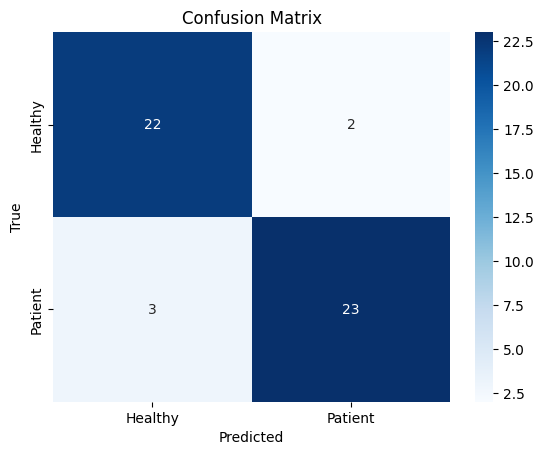

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Your true labels (ground truth)
y_true = np.argmax(y_test_one_hot, axis=1)

# Your predicted labels
y_pred = np.argmax(y_pred_classes, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Patient'], yticklabels=['Healthy', 'Patient'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
print(y_pred_classes)